<a href="https://colab.research.google.com/github/diancastroherrera-dot/Exposiciones-multicapa/blob/main/IA_PP_versi%C3%B3n_9_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Itzel Carolina Pérez Zarazúa
*   Jocelyn Andrade Martínez
*   PORRAS ALANIS ANA KAREN



SISTEMA DE RECLUTAMIENTO SIN SESGOS - RED NEURONAL MULTICAPA
Ready go!! alv!!!
PASO 1: CARGA DE DATOS
 Datos cargados: 500 candidatos, 37 columnas

 Columnas disponibles:
    1. ID_Candidato                             | Tipo: object | Nulos: 0
    2. Nombre_Completo                          | Tipo: object | Nulos: 0
    3. Email                                    | Tipo: object | Nulos: 0
    4. Telefono                                 | Tipo: int64 | Nulos: 0
    5. Posicion_Interes                         | Tipo: object | Nulos: 0
    6. Años_Experiencia                         | Tipo: object | Nulos: 0
    7. Cargo_Actual                             | Tipo: object | Nulos: 0
    8. Empresa_Actual                           | Tipo: object | Nulos: 0
    9. Empresas_Anteriores                      | Tipo: object | Nulos: 0
   10. Total_Empresas                           | Tipo: int64 | Nulos: 0
   11. Skills                                   | Tipo: object | Nulos: 0
   12. Num_Skills

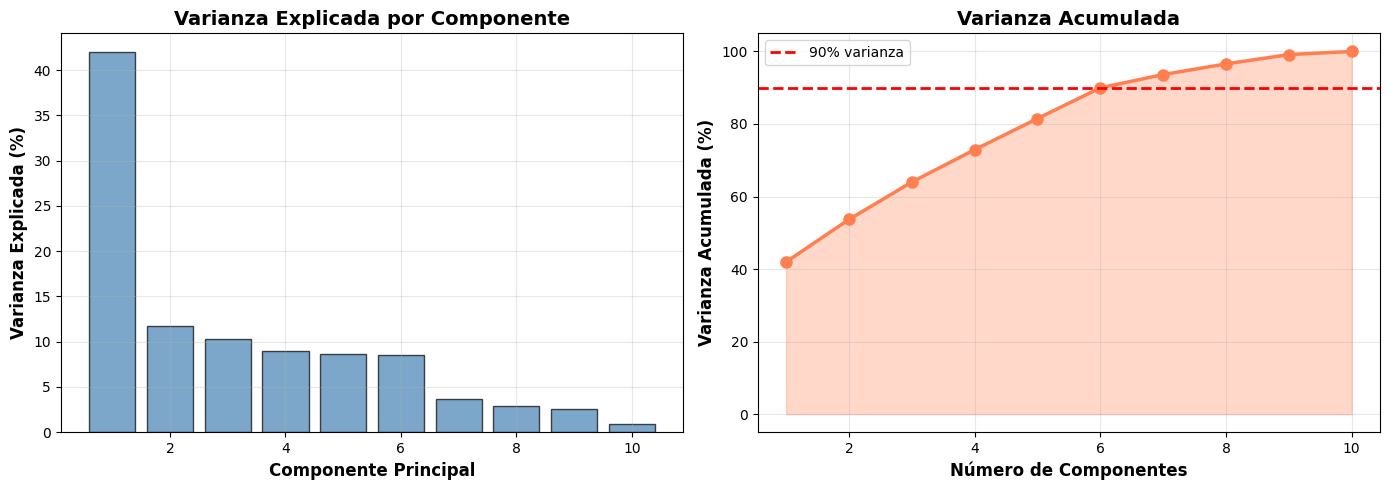

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Descargando: 1_analisis_pca.png
PASO 5: DIVISIÓN DE DATOS (Train/Val/Test)

Conjuntos de datos:
   • Entrenamiento: 304 candidatos (69.7%)
   • Validación:    66 candidatos (15.1%)
   • Prueba:        66 candidatos (15.1%)
PASO 6: RED NEURONAL MULTICAPA

 Modelo compilado:
   • Optimizador: Adam (lr=0.001)
   • Función de pérdida: MSE (Mean Squared Error)
   • Métricas: MAE, MSE
PASO 7: ENTRENAMIENTO DE LA RED NEURONAL

 Entrenando modelo, ahora sí

Epoch 123: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 157: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 172: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 172: early stopping
Restoring model weights from the end of the best epoch: 142.

 Entrenamiento completado en 172 épocas
PASO 8: EVALUACIÓN Y PREDICCIONES

 MÉTRICAS EN CONJUNTO DE PRUEBA:
   • Loss (MSE):           0.0098
   • MAE (Error absoluto): 0.0503
   • RMSE:                 0.0639

 Generando

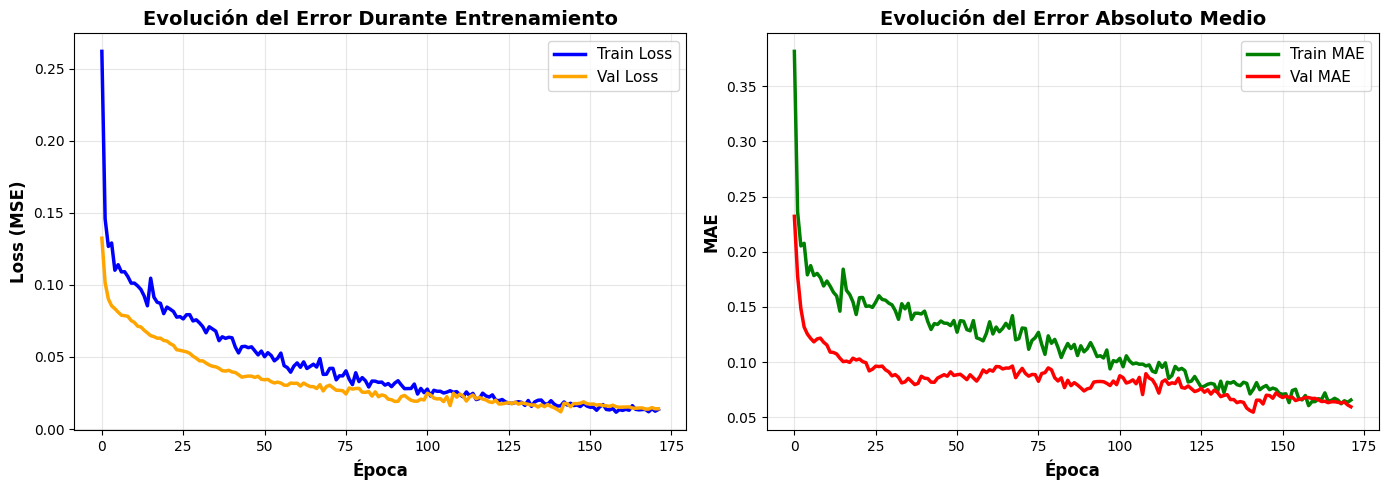

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Descargando: 2_historial_entrenamiento.png
 Gráfica guardada: 3_analisis_predicciones.png


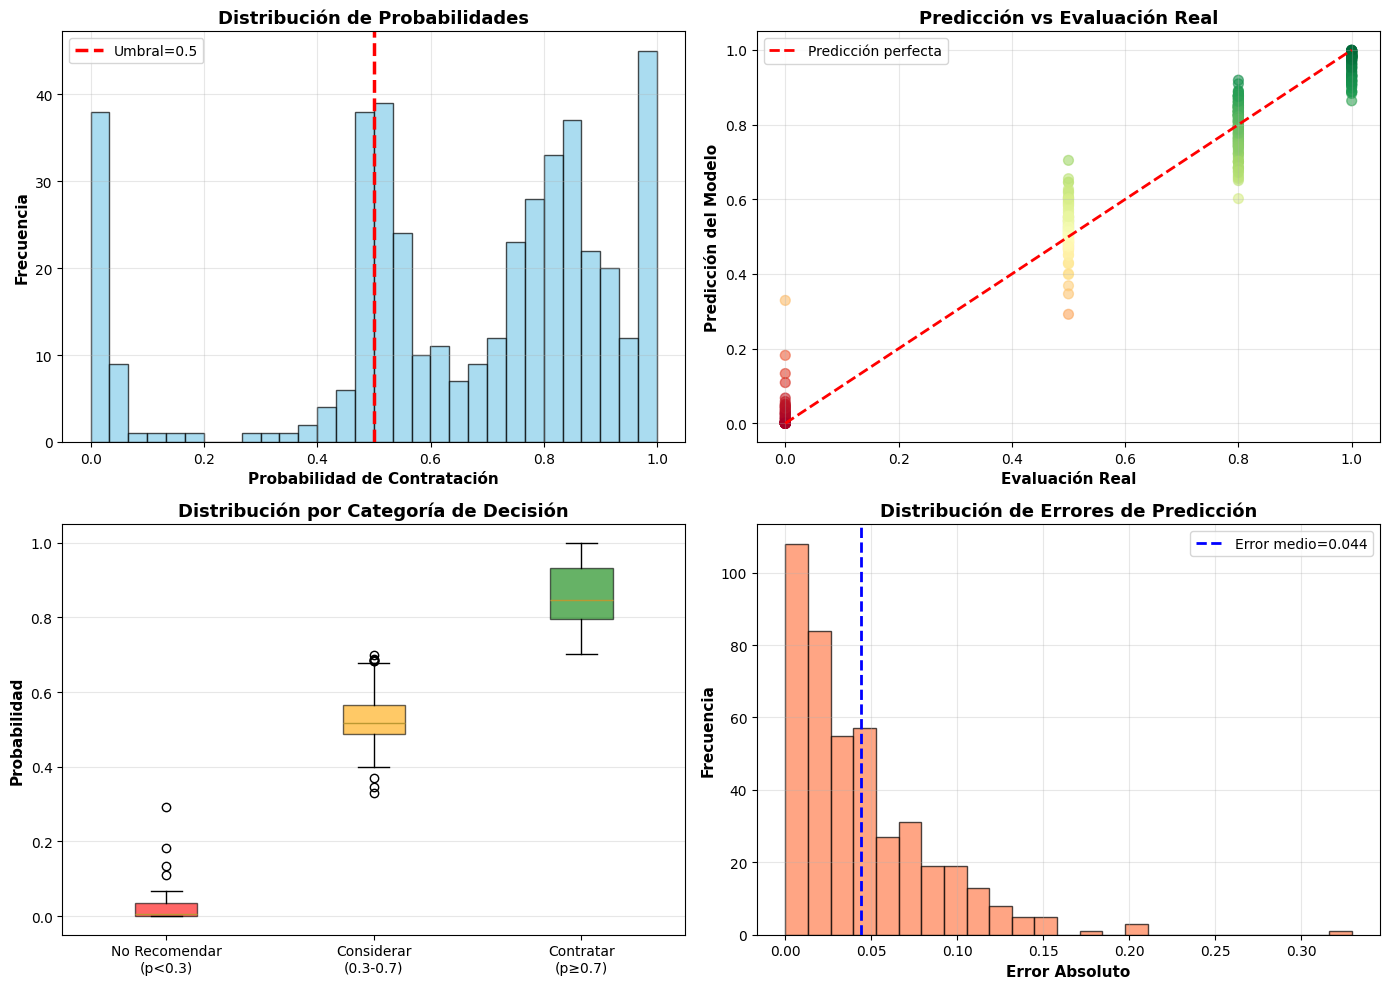

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Descargando: 3_analisis_predicciones.png
 Gráfica guardada: 4_top_candidatos.png


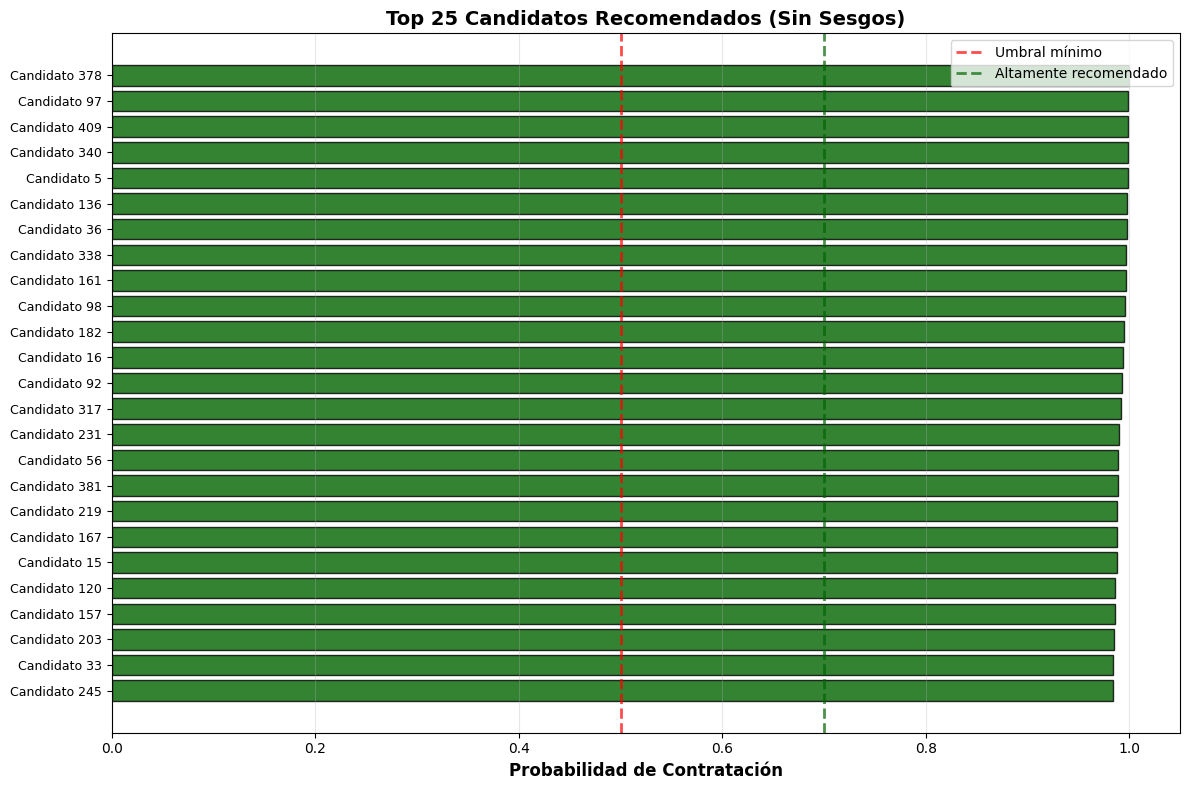

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Descargando: 4_top_candidatos.png
PASO 10: GUARDANDO RESULTADOS
Predicciones guardadas: predicciones_candidatos_sin_sesgos.csv
 Modelo guardado: modelo_reclutamiento.h5

 Iniciando descarga de archivos...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 Archivos descargados exitosamente
CONCLUSIONES

 RESULTADOS CLAVE:

1. ELIMINACIÓN DE SESGOS:
   * NO se utilizó EDAD ni GÉNERO en el modelo
   * Decisiones basadas 100% en habilidades técnicas
   * Sistema cumple con principios de equidad laboral

2. RENDIMIENTO DEL MODELO:
   * Error medio (MAE): 0.0503
   * RMSE: 0.0639
   * Modelo entrenado con 172 épocas

3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):
   * De 11 features → 10 componentes
   * Varianza capturada: 100.0%
   * Modelo más eficiente y menos propenso a overfitting

4. PREDICCIONES (ESCALA 0-1):
   * Total candidatos evaluados: 436
   * Recomendados (p≥0.5): 332
   * No recomendados (p<0.5): 104

INTERPRETACIÓN DE RESULTADOS:

• Probabilidad ≥ 0.7: ALTAMENTE RECOMENDADO (contratar inmediatamente)
• Probabilidad 0.5-0.7: RECOMENDADO (revisar en entrevista)
• Probabilidad 0.3-0.5: CONSIDERAR (segunda revisión)
• Probabilidad < 0.3: NO RECOMENDADO



ARCHIVOS GENERADOS:

• 1_analisis_pca.png
• 2_historial_entrenamiento.png
• 3_ana

In [ ]:

#bsucar entender el codigo
# RED NEURONAL MULTICAPA

"""
Objetivo: El siguiente código tiene como finalidad crear un sistema que
predice la idoneidad de candidatos (0-1) basándose solo en habilidades técnicas,
eliminando sesgos de edad y género.
"""


import pandas as pd #importamos pandas, para manipular nuestros datos
import numpy as np #importamos numpy, para la red neuronal
import matplotlib.pyplot as plt #matplotlib para las gráficas
import seaborn as sns #Para poner mamalonas las gráficas
from sklearn.preprocessing import StandardScaler  #Para estandarizar los datos
from sklearn.decomposition import PCA  #para el PCA (preprocesamiento de datos)
from sklearn.model_selection import train_test_split #Para dividir los datos en entrenamiento, validación y prueba.
import tensorflow as tf # Framework principal para crear redes neuronales.
from tensorflow import keras #Permite construir modelos de redes neuronales con pocas líneas.
                             #keras: es una interfaz más amigable que vive dentro de TensorFlow.
from tensorflow.keras import layers #layers: son las capas de la red (densas, convolucionales, dropout, etc.).
                                    #Aquí se definen las neuronas y cómo se conectan.

import warnings
warnings.filterwarnings('ignore') #Desactiva los mensajes de advertencia (warnings) que podrían aparecer en la consola.
                                   #Nada más para que se vea más limpia la consola
# Configuración visual
plt.style.use('default') #Restaura el estilo visual estándar de matplotlib.
sns.set_palette("husl") #Cambia los colores por una paleta más agradable y diferenciada (husl = tonos suaves y variados).


print("SISTEMA DE RECLUTAMIENTO SIN SESGOS - RED NEURONAL MULTICAPA")
print("Ready go!! alv!!!")


# CARGANDO ANDO DATOS

print("PASO 1: CARGA DE DATOS")

df = pd.read_excel("/content/BASE_DATOS_RECLUTAMIENTO_20251025_2128.xlsx") #Subimos nuestra Base de datos

print(f" Datos cargados: {df.shape[0]} candidatos, {df.shape[1]} columnas") #Viendo cuantas filas (shape[0] tenemos y cuentas columnas (shape[1]))
print(f"\n Columnas disponibles:")


"""
En el siguiente bloque de código vemos la información que hay para cada columna
El tipo de dato y cuantos datos nulos hay


"""
for i, col in enumerate(df.columns, 1): #enumerate(..., 1) ← agrega contador desde 1
    tipo = df[col].dtype
    nulos = df[col].isnull().sum()
    print(f"   {i:2d}. {col:40s} | Tipo: {tipo} | Nulos: {nulos}") #{i:2d} número alineado en mínimo 2 espacios ej: "1"-> " 1", "12"-> "12"
                                                                    #{col:40s} → nombre de columna en 40 espacios

# LIMPIEZA DE DATOS Y ELIMINACIÓN DE SESGOS

print("PASO 2: LIMPIEZA Y ELIMINACIÓN DE SESGOS")


df_work = df.copy() #Generando una copia y guardandola en "df_work"

# ELIMINAR COLUMNAS CON INFORMACIÓN PERSONAL Y SESGOS
columnas_eliminar = [] #una lista vácia

# Información personal (no relevante)
columnas_eliminar.extend(['ID_Candidato', 'Nombre_Completo', 'Email', 'Telefono']) #.extend() sirve para agregar varios elementos a una lista, todo en un solo paso.

# SESGOS A ELIMINAR (edad y género)
columnas_eliminar.extend(['Rango_Edad', 'Genero'])

# Información no relevante para evaluación técnica
columnas_eliminar.extend(['Nivel_Educativo', 'LinkedIn', 'Portfolio_GitHub',
                          'Fecha_Registro', 'Cargo_Actual', 'Empresa_Actual',
                          'Empresas_Anteriores', 'Status', 'Eval'])

# Columnas de evaluación que no son numéricas
columnas_eliminar.extend(['Evaluacion_Completa', 'NIVEL_GENERAL', 'RECOMENDACION'])

"""
Ya que tenemos las columnas que vamos a eliminar le vamos dando chicharron
"""

print(f"\n Eliminando columnas con información sensible y sesgos:")
columnas_eliminas_real = [] #Generando una lista vácia para ver qué columnas se eliminaron
for col in columnas_eliminar: #Recorriendo la lista con el nombre de las columnas
    if col in df_work.columns: #Sí el elemento esta en mi base de datos "df_work" entonces:
        df_work = df_work.drop(columns=[col]) # drop() quita columnas o filas
                                              # columns=[col] especifica que la quieremos eliminar por nombre

        columnas_eliminas_real.append(col) #Guardamos el nombre de las columnas eliminadas en la lista vacía "columnas_eliminas_real"
        print(f" {col}")

print(f"\n Total columnas eliminadas: {len(columnas_eliminas_real)}")



# CREAR VARIABLE OBJETIVO desde RECOMENDACION
if 'RECOMENDACION' in df.columns: #¿la columna RECOMENDACION existe en el dataframe original df?
    print(f"\n Creando variable objetivo desde 'RECOMENDACION'...")

    # Mapeo de recomendaciones a valores 0-1
    """

    Se genera una nueva columna en el DataFrame df_work llamada "Target" por medio de la
    función mapear_recomendacion.

    Devuelve la columna de "Recomencación "en valor numérico

    """


    def mapear_recomendacion(valor): #Declaramos nuestra función llamada "mapear_recomendacion"
        if pd.isna(valor): #Sí, hay un dato nulo (si la recomendación esta vacía) entonces:
            return np.nan #devuelve "NaN"
        valor_str = str(valor).upper().strip() #Generamos una variable llamda "valor_str" que almacena las recomendaciones en mayuscula y elimina los
                                              #espacios en blancos que están demás al inicio y al final

        if 'ALTAMENTE' in valor_str: #Si la recomendaciín es "ALTAMENTE"  entonces:
            return 1.0 #Devuelve un 1
        elif 'RECOMENDADO' in valor_str and 'NO' not in valor_str: #Si la recomendaciín es "RECOMENDADO"  entonces:
            return 0.8         #Devuelve un .8
        elif 'CONSIDERAR' in valor_str: #Si la recomendaciín es "CONSIDERAR"  entonces:
            return 0.5    #Devuelve un .5
        elif 'NO RECOMENDADO' in valor_str: #Si la recomendaciín es "No recomendado"  entonces:
            return 0.0 #Devuelve un cero"
        else:
            return np.nan #Si contiene cualqueir otro valor entonces lo guarda como un "nan-+"

    df_work['Target'] = df['RECOMENDACION'].apply(mapear_recomendacion) #Aplicamos la función "mapear_recomendacion" a la columna "RECOMENDACION"
                                                                        #y lo guardamos en la columna "Target"


    # Mostrar distribución
    print(f"\n   Distribución de recomendaciones:")
    dist = df['RECOMENDACION'].value_counts()  #value_counts(): Vemos los valores unicos y se almanenan en "dist"
    for valor, count in dist.items():   #Para cada valor, count en el elmento dist se hará lo siguiente:
        print(f" {valor}: {count} candidatos") #Se mostrara el tipo de recomendación y cuantos candidatos hay para cada tipo

    # Eliminar candidatos sin evaluación
    antes = len(df_work)
    df_work = df_work.dropna(subset=['Target']) #Esto elimina de df_work todas las filas donde Target sea NaN (vacío).
                                                #Porque dropna puede eliminar NaN en muchas columnas, pero aquí le decimos:
                                                #solo revisa la columna ‘Target’

    despues = len(df_work) #con cuantos datos nos quedamos
    print(f"\n  Candidatos con evaluación válida: {despues}/{antes}")
else:
    raise ValueError("NO se encontró la columna 'RECOMENDACION' en los datos")


"""
Notas:

target = y.
target = lo que la IA tiene que aprender a predecir
Por eso se separa la columna "Target" del data frame
"""


# Separando el Target del resto
target = df_work['Target'].values  #Extrayendo los valores de la columna "Target"
df_work = df_work.drop('Target', axis=1)  #Eliminando la columna "Target" del data frame


#Features = variables predictoras, las columnas que son la ENTRADA del modelo

# SELECCIONAR SOLO COLUMNAS NUMÉRICAS
print(f"\n Seleccionando features numéricas...")
numeric_cols = df_work.select_dtypes(include=[np.number]).columns.tolist() #selecciona solamente las columnas del DataFrame que son NUMÉRICAS
                                                                           # .columns - Extrae el nombre de esas columna
                                                                           # .tolist() convierte esos nombres en una lista de Python
                                                                           #Porque después normalmente esa lista se usa para hacer cosas como:
                                                                           #- seleccionar solo esas columnas, normalizarlas, limentar el modelo, estandarizarlas

print(f"\n Features finales ({len(numeric_cols)} columnas):")

#Generando por columna la media y desviación estandar

for i, col in enumerate(numeric_cols, 1):
    mean_val = df_work[col].mean()
    std_val = df_work[col].std()
    print(f"   {i:2d}. {col:40s} | μ={mean_val:6.2f} | σ={std_val:6.2f}")


#PASO IMPORTANTE

# Crear matriz de features
X = df_work[numeric_cols].values #df_work[numeric_cols] → esto toma SOLO las columnas numéricas del dataframe
                                  #.values → convierte ese sub-dataframe a un arreglo de numpy (matriz)

y = target



print(f"\n DATOS FINALES:")
print(f"   • Features (X): {X.shape}")
print(f"   • Target (y): {y.shape}")
print(f"   • Candidatos totales: {len(X)}")

#Nos una matriz de 436 filas por 11 columnas

if len(X) == 0:
    raise ValueError(" ERROR: NO hay datos para entrenar") #Con raise, uno puede lanzar su propio error con su propio mensaje.

"""
Ya que limpiamos los datos ahora sí, empieza lo bueno

"""

#  NORMALIZACIÓN

print("PASO 3: NORMALIZACIÓN DE DATOS")

#Estalanlo los datos
scaler = StandardScaler() #convertir cada columna para que tenga media = 0 y desviación estándar = 1
X_scaled = scaler.fit_transform(X)   #fit(X) → calcula la media y la desviación estándar de cada columna de X
                                     #transform(X) → usa esas medias y desviaciones para escalar los datos


#Verificando que todo chido

print(f" Datos normalizados con StandardScaler")
print(f"   • Media antes: {X.mean():.4f} → después: {X_scaled.mean():.4f}")
print(f"   • Std antes: {X.std():.4f} → después: {X_scaled.std():.4f}")


# PCA - REDUCCIÓN DE DIMENSIONALIDAD


print("PASO 4: PCA - ANÁLISIS DE COMPONENTES PRINCIPALES")
"""
PCA va a elegir automáticamente cuántos componentes son necesarios para conservar el 90% de la información relevante del dataset
Osea, que la reducción debe conservar ~90% de información
"""

# Determinar número óptimo de componentes (mantener 90% de varianza)
n_components = min(10, X_scaled.shape[1]) #min(10, X_scaled.shape[1]) -> elige el menor entre 10 y el número de columnas(11)
pca = PCA(n_components=n_components)  #quiero un PCA y quiero que use X cantidad de componentes
                                      #esto solo define cuántos componentes quieremos

X_pca = pca.fit_transform(X_scaled) #fit → calcula los componentes principales con el dataset
                                    #transform → convierte los datos originales a esos nuevos ejes
                                    #X_pca es la nueva matriz transformada, con menos columnas.

print(f"\n Reducción de dimensionalidad:")
print(f"   • Dimensiones originales: {X_scaled.shape[1]}")
print(f"   • Componentes principales: {X_pca.shape[1]}")



print(f"\n Varianza explicada por cada componente:")
"""
El objetivo es elegir cuántas componentes conservar para mantener suficiente información sin usar todas las variables originales.

PCA toma las variables originales y las combina para crear uevas variables (“componentes”) que capturen la mayor cantidad de varianza posible.
El primer componente captura la mayor información, el segundo lo que queda, etc.

"""


for i, var in enumerate(pca.explained_variance_ratio_, 1): #obtiene la varianza explicada como números entre 0 y 1
    print(f"   PC{i}: {var*100:5.2f}%") #Cada elemento lo pasa a porcentaje




varianza_acumulada = np.cumsum(pca.explained_variance_ratio_) #cumsum = cumulative sum = suma acumulada
print(f"\n Varianza total capturada: {varianza_acumulada[-1]*100:.2f}%") #toma la última suma acumulada (toda la varianza que capturamos)

# Gráfica de PCA
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))   #significa 1 fila, 2 columnas de gráficos
                                                        #14 de ancho, 5 de alto (en pulgadas)

# Varianza por componente
ax1.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_*100, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Componente Principal', fontsize=12, fontweight='bold')
ax1.set_ylabel('Varianza Explicada (%)', fontsize=12, fontweight='bold')
ax1.set_title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Varianza acumulada
ax2.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada*100,
         marker='o', linewidth=2.5, markersize=8, color='coral')
ax2.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% varianza')
ax2.fill_between(range(1, len(varianza_acumulada)+1), varianza_acumulada*100,
                 alpha=0.3, color='coral')
ax2.set_xlabel('Número de Componentes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Varianza Acumulada (%)', fontsize=12, fontweight='bold')
ax2.set_title('Varianza Acumulada', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('1_analisis_pca.png', dpi=300, bbox_inches='tight')
print(f"\n Gráfica guardada: 1_analisis_pca.png")
plt.show()
plt.close()

# Descargar en Colab
try:
    from google.colab import files
    files.download('1_analisis_pca.png')
    print(f" Descargando: 1_analisis_pca.png")
except:
    print(f"  Para descargar manualmente, buscar el archivo en el panel izquierdo")
    pass



"""
Paso importante:

  """

# DIVISIÓN DE DATOS


print("PASO 5: DIVISIÓN DE DATOS (Train/Val/Test)")

"""
Se dividieron en 3 partes:
* Train para el entrenamiento del modelo
* Val para la validación del modelo (para evitar overfitting)
* Test para la evaluación final del modelo

"""

# División 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(  #X_test / y_test el 15% final (con el que se hace la prueba final)
                                                    #X_temp / y_temp el otro 85% restante (que luego todavía se separará)
                                                    #s una función de scikit-learn que sirve para dividir los datos en partes.

    X_pca, y, test_size=0.15, random_state=42 )     #test_size=0.2 significa 20% para test y 80% para train
                                                    #X_pca -> las variables/predictores (features) ya transformadas con PCA
                                                    # y -> las etiquetas / variable objetivo (0/1 por ejemplo)

                                                    # random_state=42 -> asegura que la división sea idéntica cada vez
                                                    #no importa el número:  pudo haber sido 7, 123, 2024…
                                                    # pero 42 se volvió el número “famoso” por el libro Guía del autoestopista galáctico
                                                    #donde 42 es “la respuesta al sentido de la vida” xd




X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42  # 0.176*0.85 ≈ 0.15 #Esto sale de una regla de 3, porque no se puede separar en 3 directamente
)

print(f"\nConjuntos de datos:")
print(f"   • Entrenamiento: {X_train.shape[0]} candidatos ({X_train.shape[0]/len(X)*100:.1f}%)")  #Calcula el número de filas para el entrenamiento, lo convierte a porcentaje
print(f"   • Validación:    {X_val.shape[0]} candidatos ({X_val.shape[0]/len(X)*100:.1f}%)")  #Calcula el número de filas para la validación, lo convierte a porcentaje
print(f"   • Prueba:        {X_test.shape[0]} candidatos ({X_test.shape[0]/len(X)*100:.1f}%)")  #Calcula el número de filas para el test, lo convierte a porcentaje

"""
Ahora sí, va el modelo
"""


# PASO 6: RED NEURONAL MULTICAPA

print("PASO 6: RED NEURONAL MULTICAPA")


input_dim = X_pca.shape[1]  #Obtiene la dimensión de entrada (número de características/features) que recibirá la red neuronal.
                            #El número de columnas que recibira

# Arquitectura de la red
model = keras.Sequential([   #Crea un modelo secuencial (capas una tras otra)
    # Entrada
    layers.Input(shape=(input_dim,)), #layers.Input() → DEclara una Capa de entrada
                                      #Donde, cada candidato tendrá un vector de 10 elementos (input_dim)

    # Capa oculta 1: Extracción de características profundas
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),  #layers.Dense ->Declara una capa densa
                                                                                           #Donde:  Todas las neuronas reciben toda la información de la capa anterior.
                                                                                           #Usamos 64 neuronas
                                                                                           #Es una capa densa por que los datos son tabulares (columnas)
                                                                                           #activation='relu'-> Acelera y permite no linealidad (aprendizaje complejo)
                                                                                           #kernel_regularizer=l2(0.001) ->Evita que memorice (reduce overfitting)
                                                                                           #regularizer = “penalizador”
                                                                                          #l2 -> penaliza pesos muy grandes
                                                                                          #0.001-> es la intensidad de ese castigo


    layers.BatchNormalization(),  #BatchNormalization = normalización por lotes
                                  #cuando las neuronas calculan cosas, los números pueden ir creciendo, o tener escalas raras (demasiado grandes o demasiado chicos)
                                  #BatchNormalization agarra los valores y los pone en una escala estable

    layers.Dropout(0.3), #durante el entrenamiento, apaga el 30% de las neuronas de esa capa cada vez que pasas un batch (mini grupo de datos usado en un paso del entrenamiento)

    # Capa oculta 2: Refinamiento de patrones
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)), #ahora sólo hay 32 neuronas
    layers.BatchNormalization(),
    layers.Dropout(0.2), #durante el entrenamiento, apaga el 20% de las neuronas de esa capa

    # Capa oculta 3: Características de alto nivel
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),  #durante el entrenamiento, apaga el 10% de las neuronas de esa capa


    # Capa de salida: Probabilidad 0-1 (SIGMOID)
    layers.Dense(1, activation='sigmoid')  #Capa densa, con una neurona
])


# Compilar modelo
model.compile(   #cómo va a aprender y cómo se va a evaluar
    optimizer=keras.optimizers.Adam(learning_rate=0.001), #Adam es el optimizador que se usará para ajustar los pesos de la red.
                                                          #lr es learning rate (tasa de aprendizaje).
                                                          # un optimizer es el algoritmo que ajusta los pesos
                                                          # learning_rate=0.001 indica qué tan rápido ajusta pesos
    loss='mse',  # Mean Squared Error para regresión | mse = mean squared error = error cuadrático medio
                 #loss=  función de pérdida (mse)
                 #Es la que le dice al modelo “qué tan mal lo hicimos” en cada predicción.
                #El entrenamiento busca minimizar ese valor.
                 #mse-> MSE penaliza más los errores grandes (porque lo eleva al cuadrado) (se calcula al final)

    metrics=['mae', 'mse'] # mae	Mean Absolute Error	error promedio absoluto (sin elevar al cuadrado)
)

print("\n Modelo compilado:")
print("   • Optimizador: Adam (lr=0.001)")
print("   • Función de pérdida: MSE (Mean Squared Error)")
print("   • Métricas: MAE, MSE")

# ENTRENAMIENTO

print("PASO 7: ENTRENAMIENTO DE LA RED NEURONAL")

"""evita que la red siga entrenando cuando ya está sobreajustando.  """
callbacks = [    #monitoriando la red
    keras.callbacks.EarlyStopping(  #si la red empieza a empeorar en validación durante X épocas seguidas, detiene el entrenamiento.
        monitor='val_loss',  #está vigilando la pérdida del conjunto de validación
        patience=30, #si pasan 30 épocas sin mejorar → detiene
        restore_best_weights=True, #al final, regresa los pesos de la mejor época
        verbose=1 #imprime mensajes
    ),

    keras.callbacks.ReduceLROnPlateau( #si la pérdida no mejora después de X épocas,reduce el learning rate (lr).
        monitor='val_loss',  #también mira la validación
        factor=0.5,  #reduce el lr a la mitad
        patience=15, #espera 15 épocas antes de reducir
        min_lr=1e-7, #no baja más que ese mínimo
        verbose=1
    )
]


print("\n Entrenando modelo, ahora sí")

history = model.fit(   #fit = entrena la red.
    X_train, y_train, #X_train → inputs (features), y_train → etiquetas reales (valores objetivo)
    validation_data=(X_val, y_val), #Se usan para evaluar cómo va el modelo cada época.
    epochs=200, #epocas
    batch_size=4, #cuántos candidatos ve la red a la vez antes de actualizar pesos
    callbacks=callbacks, #los dos callbacks que declaramos antes:EarlyStopping, ReduceLROnPlateau
    verbose=0 #no imprime nada
)

print(f"\n Entrenamiento completado en {len(history.history['loss'])} épocas")

# EVALUACIÓN Y PREDICCIONES

print("PASO 8: EVALUACIÓN Y PREDICCIONES")


# Evaluar en test set
test_loss, test_mae, test_mse = model.evaluate(X_test, y_test, verbose=0)

print(f"\n MÉTRICAS EN CONJUNTO DE PRUEBA:")
print(f"   • Loss (MSE):           {test_loss:.4f}")
print(f"   • MAE (Error absoluto): {test_mae:.4f}")
print(f"   • RMSE:                 {np.sqrt(test_mse):.4f}")

# PREDICCIONES PARA TODOS LOS CANDIDATOS
print(f"\n Generando predicciones para todos los candidatos...")
predicciones_todas = model.predict(X_pca, verbose=0).flatten()

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Candidato_ID': range(1, len(predicciones_todas) + 1),
    'Probabilidad': predicciones_todas,
    'Evaluacion_Real': y,
    'Decision': ['CONTRATAR' if p >= 0.5 else 'NO CONTRATAR' for p in predicciones_todas]
})

# Ordenar por probabilidad
resultados = resultados.sort_values('Probabilidad', ascending=False).reset_index(drop=True)

print(f"\n TOP 15 CANDIDATOS RECOMENDADOS POR LA RED NEURONAL:")
print(resultados.head(15).to_string(index=False))

print(f"\n  ÚLTIMOS 5 CANDIDATOS (MENOR PROBABILIDAD):")

print(resultados.tail(5).to_string(index=False))

# Estadísticas de predicciones
print(f"\n ESTADÍSTICAS DE PREDICCIONES:")
print(f"   • Probabilidad media:    {predicciones_todas.mean():.4f}")
print(f"   • Desviación estándar:   {predicciones_todas.std():.4f}")
print(f"   • Mínimo:                {predicciones_todas.min():.4f}")
print(f"   • Máximo:                {predicciones_todas.max():.4f}")
print(f"   • Candidatos a CONTRATAR (p≥0.5): {(predicciones_todas >= 0.5).sum()}")
print(f"   • Candidatos NO aptos (p<0.5):    {(predicciones_todas < 0.5).sum()}")

# GRÁFICAS

print("PASO 9: GENERACIÓN DE GRÁFICAS")


# GRÁFICA 1: Historial de entrenamiento
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2.5, color='blue')
axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2.5, color='orange')
axes[0].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
axes[0].set_title('Evolución del Error Durante Entrenamiento', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# MAE
axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2.5, color='green')
axes[1].plot(history.history['val_mae'], label='Val MAE', linewidth=2.5, color='red')
axes[1].set_xlabel('Época', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=12, fontweight='bold')
axes[1].set_title('Evolución del Error Absoluto Medio', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('2_historial_entrenamiento.png', dpi=300, bbox_inches='tight')
print(f"Gráfica guardada: 2_historial_entrenamiento.png")
plt.show()
plt.close()

# Descargar en Colab
try:
    from google.colab import files
    files.download('2_historial_entrenamiento.png')
    print(f" Descargando: 2_historial_entrenamiento.png")
except:
    print(f"  Para descargar manualmente, busca el archivo en el panel izquierdo")
    pass

# GRÁFICA 2: Distribución de probabilidades y comparación
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de probabilidades
axes[0, 0].hist(predicciones_todas, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', linewidth=2.5, label='Umbral=0.5')
axes[0, 0].set_xlabel('Probabilidad de Contratación', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribución de Probabilidades', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Scatter: Predicción vs Real
axes[0, 1].scatter(y, predicciones_todas, alpha=0.6, s=50, c=predicciones_todas, cmap='RdYlGn')
axes[0, 1].plot([0, 1], [0, 1], 'r--', linewidth=2, label='Predicción perfecta')
axes[0, 1].set_xlabel('Evaluación Real', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Predicción del Modelo', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Predicción vs Evaluación Real', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Box plot de predicciones por categoría
categorias = ['No Recomendar\n(p<0.3)', 'Considerar\n(0.3-0.7)', 'Contratar\n(p≥0.7)']
datos_boxplot = [
    predicciones_todas[predicciones_todas < 0.3],
    predicciones_todas[(predicciones_todas >= 0.3) & (predicciones_todas < 0.7)],
    predicciones_todas[predicciones_todas >= 0.7]
]
bp = axes[1, 0].boxplot(datos_boxplot, labels=categorias, patch_artist=True)
for patch, color in zip(bp['boxes'], ['red', 'orange', 'green']):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)
axes[1, 0].set_ylabel('Probabilidad', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Distribución por Categoría de Decisión', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Errores de predicción
errores = np.abs(y - predicciones_todas)
axes[1, 1].hist(errores, bins=25, alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].axvline(x=errores.mean(), color='blue', linestyle='--', linewidth=2,
                   label=f'Error medio={errores.mean():.3f}')
axes[1, 1].set_xlabel('Error Absoluto', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribución de Errores de Predicción', fontsize=13, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('3_analisis_predicciones.png', dpi=300, bbox_inches='tight')
print(f" Gráfica guardada: 3_analisis_predicciones.png")
plt.show()
plt.close()

# Descargar en Colab
try:
    from google.colab import files
    files.download('3_analisis_predicciones.png')
    print(f" Descargando: 3_analisis_predicciones.png")
except:
    print(f" Para descargar manualmente, busca el archivo en el panel izquierdo")
    pass

# GRÁFICA 3: Top candidatos
fig, ax = plt.subplots(figsize=(12, 8))

top_n = min(25, len(resultados))
top_candidatos = resultados.head(top_n)

colores = ['darkgreen' if p >= 0.7 else 'green' if p >= 0.6 else 'orange'
           for p in top_candidatos['Probabilidad']]

bars = ax.barh(range(len(top_candidatos)), top_candidatos['Probabilidad'],
               color=colores, alpha=0.8, edgecolor='black')

ax.set_yticks(range(len(top_candidatos)))
ax.set_yticklabels([f"Candidato {id}" for id in top_candidatos['Candidato_ID']], fontsize=9)
ax.set_xlabel('Probabilidad de Contratación', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Candidatos Recomendados (Sin Sesgos)',
             fontsize=14, fontweight='bold')
ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Umbral mínimo')
ax.axvline(x=0.7, color='darkgreen', linestyle='--', linewidth=2, alpha=0.7,
           label='Altamente recomendado')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='x')
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('4_top_candidatos.png', dpi=300, bbox_inches='tight')
print(f" Gráfica guardada: 4_top_candidatos.png")
plt.show()
plt.close()

# Descargar en Colab
try:
    from google.colab import files
    files.download('4_top_candidatos.png')
    print(f" Descargando: 4_top_candidatos.png")
except:
    print(f" Para descargar manualmente, busca el archivo en el panel izquierdo")
    pass

# GUARDAR RESULTADOS
#

print("PASO 10: GUARDANDO RESULTADOS")


# Guardar predicciones
resultados.to_csv('predicciones_candidatos_sin_sesgos.csv', index=False)
print(f"Predicciones guardadas: predicciones_candidatos_sin_sesgos.csv")

# Guardar modelo
model.save('modelo_reclutamiento.h5')
print(f" Modelo guardado: modelo_reclutamiento.h5")

# Descargar archivos en Colab
try:
    from google.colab import files
    print(f"\n Iniciando descarga de archivos...")
    files.download('predicciones_candidatos_sin_sesgos.csv')
    files.download('modelo_reclutamiento.h5')
    print(f" Archivos descargados exitosamente")
except:
    print(f"\n  Para descargar manualmente:")
    print(f"   1. Ve al panel izquierdo de Colab (icono de carpeta 📁)")
    print(f"   2. Busca los archivos y haz clic derecho → Descargar")
    pass

# CONCLUSIONES
#

print("CONCLUSIONES")


print(f"""
 RESULTADOS CLAVE:

1. ELIMINACIÓN DE SESGOS:
   * NO se utilizó EDAD ni GÉNERO en el modelo
   * Decisiones basadas 100% en habilidades técnicas
   * Sistema cumple con principios de equidad laboral

2. RENDIMIENTO DEL MODELO:
   * Error medio (MAE): {test_mae:.4f}
   * RMSE: {np.sqrt(test_mse):.4f}
   * Modelo entrenado con {len(history.history['loss'])} épocas

3. REDUCCIÓN DE DIMENSIONALIDAD (PCA):
   * De {X_scaled.shape[1]} features → {X_pca.shape[1]} componentes
   * Varianza capturada: {varianza_acumulada[-1]*100:.1f}%
   * Modelo más eficiente y menos propenso a overfitting

4. PREDICCIONES (ESCALA 0-1):
   * Total candidatos evaluados: {len(predicciones_todas)}
   * Recomendados (p≥0.5): {(predicciones_todas >= 0.5).sum()}
   * No recomendados (p<0.5): {(predicciones_todas < 0.5).sum()}

INTERPRETACIÓN DE RESULTADOS:

• Probabilidad ≥ 0.7: ALTAMENTE RECOMENDADO (contratar inmediatamente)
• Probabilidad 0.5-0.7: RECOMENDADO (revisar en entrevista)
• Probabilidad 0.3-0.5: CONSIDERAR (segunda revisión)
• Probabilidad < 0.3: NO RECOMENDADO



ARCHIVOS GENERADOS:

• 1_analisis_pca.png
• 2_historial_entrenamiento.png
• 3_analisis_predicciones.png
• 4_top_candidatos.png
• predicciones_candidatos_sin_sesgos.csv
• modelo_reclutamiento.h5
""")

print("fin, alv")